## Vehicular Activities and its Contribution to Particulate Matter Levels

## An Analysis of Air Quality Index and AQI Bucket in Delhi from 2015 to 2020

In [3]:
#Importing Libraries 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading datasets into data frames
df = pd.read_csv("city_day.csv")
df_auto = pd.read_csv("delhi-vehicles-2006-2022.csv")

In [5]:
#Viewing the first five rows of both data frames
#df.head()
df_auto.head()

,Year,Cars and jeeps,Two-wheelers,Ambulances,Auto rickshaws,Taxies,Buses,Other Passenger Vehicles,Tractors,Goods vehicles (all types),Others,Total,Increase (num),Increase (%),No of vehicles per 1000 population,Remarks
0,2005-06,1471858,3078660,2088,74188,20646,25511,18378,4811.0,128193,5803.0,4830136,"3,62,982",8.13,317,NaN
1,2006-07,1599463,3335763,2222,74200,25891,26491,19751,4859.0,137983,5803.0,5232426,"4,02,290",8.33,337,NaN
2,2007-08,1729695,3578199,2226,75297,30704,26933,18967,4855.0,155871,4637.0,5627384,"3,94,958",7.55,356,NaN
3,2008-09,1863574,3808503,2294,83965,4001,28453,19766,4970.0,170398,4637.0,6026561,"3,99,177",7.09,374,NaN
4,2009-10,2017882,4065789,2392,86501,45169,30560,20371,5058.0,188353,4637.0,6466713,"4,40,152",7.30,393,NaN


In [6]:
#Getting information about both data frames
#df.info()
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                17 non-null     object 
 1   Cars and jeeps                      17 non-null     int64  
 2   Two-wheelers                        17 non-null     int64  
 3   Ambulances                          17 non-null     int64  
 4   Auto rickshaws                      17 non-null     int64  
 5   Taxies                              17 non-null     int64  
 6   Buses                               17 non-null     int64  
 7   Other Passenger Vehicles            17 non-null     int64  
 8   Tractors                            10 non-null     float64
 9   Goods vehicles (all types)          17 non-null     int64  
 10  Others                              10 non-null     float64
 11  Total                               17 non-null

In [7]:
#Filtering the data frame to cover the scope of the project 
df_delhi = df[df.City == 'Delhi']
df_delhi.reset_index(drop = True, inplace = True)

In [8]:
#Viewing first five rows of the new data frame
df_delhi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
1,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
2,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
3,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
4,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [9]:
#Viewing the shape of the data frame
df_delhi.shape

(2009, 16)

In [10]:
#Viewing information about the numeric columns
df_delhi.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,2007.000000,1932.000000,2007.000000,2007.000000,2009.000000,2000.000000,2009.000000,1899.000000,1925.00000,2009.000000,2009.000000,1228.000000,1999.000000
mean,117.196153,232.809229,38.985595,50.785182,58.567023,41.997150,1.976053,15.901253,51.32361,3.544480,17.185042,1.438339,259.487744
std,82.912945,121.873025,33.389456,22.696721,37.690350,17.301221,2.560253,7.966770,26.06234,2.431232,15.291597,2.377762,119.537333
min,10.240000,18.590000,3.570000,10.630000,0.000000,6.780000,0.000000,2.340000,6.94000,0.000000,0.000000,0.000000,29.000000
25%,57.095000,137.040000,15.895000,33.895000,31.150000,31.157500,0.910000,10.335000,33.71000,1.870000,6.650000,0.110000,161.500000
50%,94.620000,216.730000,27.200000,47.150000,52.750000,38.040000,1.240000,14.450000,44.44000,2.960000,12.750000,0.650000,257.000000
75%,153.030000,311.667500,50.790000,63.570000,75.360000,48.792500,1.870000,19.700000,60.84000,4.680000,23.200000,1.970000,345.500000
max,685.360000,796.880000,221.030000,162.500000,254.800000,166.700000,30.440000,71.560000,257.73000,20.640000,103.000000,23.300000,716.000000


In [11]:
#Getting information about the new filtered data frame
df_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 251.3+ KB


In [12]:
#Filling the missing values in the numeric columns with the mean value

def fill_null_with_mean(df):
    for col in df_delhi.columns:
        if pd.api.types.is_numeric_dtype(df_delhi[col]):
            df_delhi[col] = df_delhi[col].fillna(df_delhi[col].mean())
    return df_delhi

df_delhi = fill_null_with_mean(df_delhi)


In [13]:
#Dropping AQI and AQI_Bucket to recalculate them
df_delhi.drop(columns = ['AQI', 'AQI_Bucket'], axis = 1, inplace = True)

In [14]:
#Computing the AQI for each day
def compute_max(row):
    return max(row[2:14])

df_delhi['AQI'] = df_delhi.apply(compute_max, axis=1)

In [15]:
#Computing the AQI_Bucket for each day based on the AQI
def get_AQI_bucket(x):
    if x <= 50:
        return 'Good'
    elif x <= 100:
        return 'Satisfactory'
    elif x <= 200:
        return 'Moderate'
    elif x <= 300:
        return 'Poor'
    elif x <= 400:
        return 'Very Poor'
    elif x > 400:
        return 'Severe'

df_delhi['AQI_Bucket'] = df_delhi['AQI'].apply(lambda x: get_AQI_bucket(x))


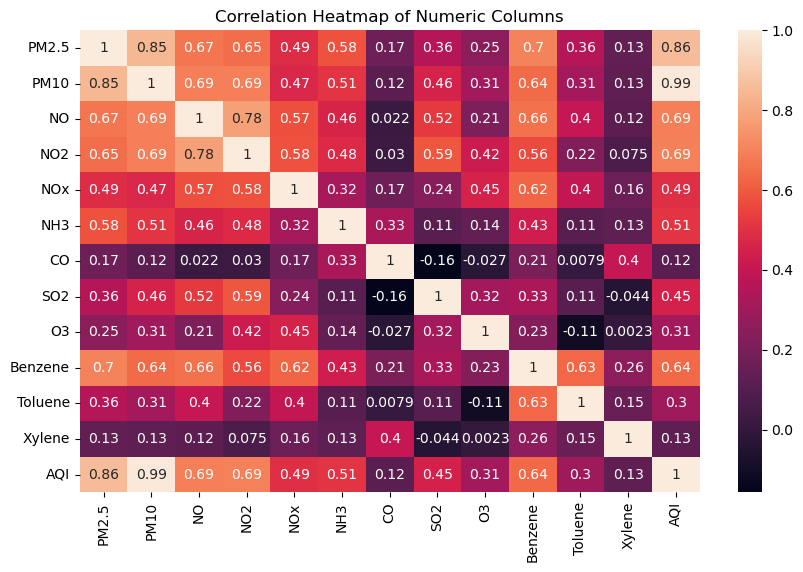

In [16]:
#Correlation Heatmap Plot
numeric_df = df_delhi.iloc[:, 2:15]
df_corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot = True)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [17]:
#Reducing the PM2.5 and PM.10 values by 50% and other pollutants by 50%
reduction_50 = 0.50

df_PM = df_delhi.copy()
df_PM[['PM2.5', 'PM10']] *= (reduction_50)

df_others = df_delhi.copy()
df_others[['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']] *= (reduction_50)

df_PM['AQI'] = df_PM.apply(compute_max, axis=1)
df_PM['AQI_Bucket'] = df_PM['AQI'].apply(lambda x: get_AQI_bucket(x))


df_others['AQI'] = df_others.apply(compute_max, axis=1)
df_others['AQI_Bucket'] = df_others['AQI'].apply(lambda x: get_AQI_bucket(x))



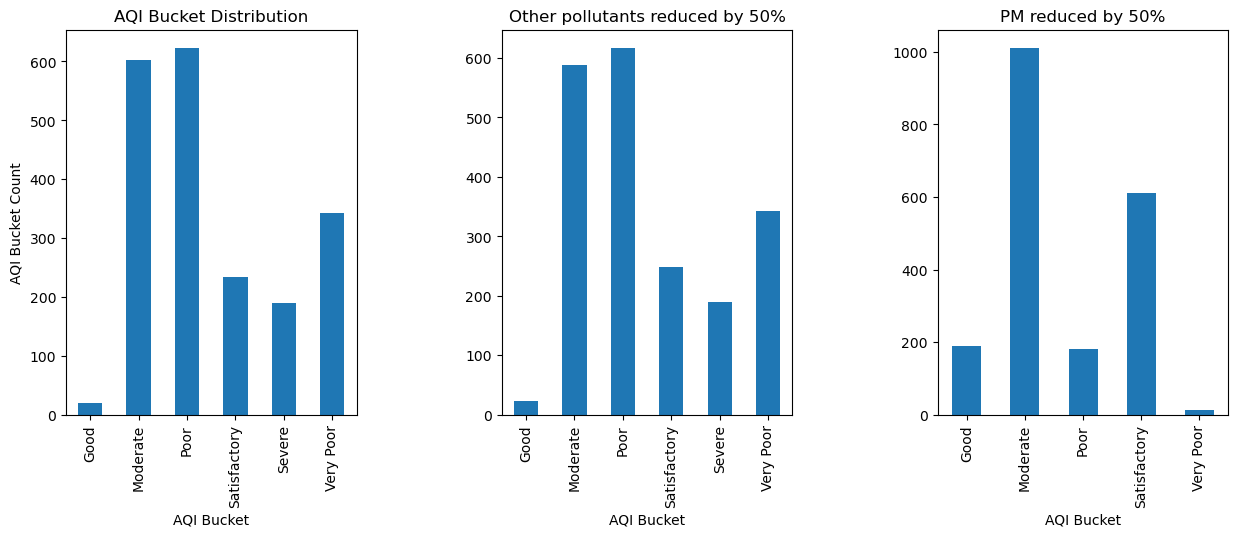

In [18]:
#Plots of the AQI Bucket Distribution under three different conditions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
grouped = df_delhi.groupby('AQI_Bucket')['AQI_Bucket'].count()
grouped.plot(kind='bar', ax=ax1)
ax1.set_xlabel('AQI Bucket')
ax1.set_ylabel('AQI Bucket Count')
ax1.set_title('AQI Bucket Distribution')

grouped_others = df_others.groupby('AQI_Bucket')['AQI_Bucket'].count()
grouped_others.plot(kind='bar', ax=ax2)
ax2.set_xlabel('AQI Bucket')
ax2.set_title('Other pollutants reduced by 50%')

grouped_PM = df_PM.groupby('AQI_Bucket')['AQI_Bucket'].count()
grouped_PM.plot(kind='bar', ax=ax3)
ax3.set_xlabel('AQI Bucket')
ax3.set_title('PM reduced by 50%')

plt.subplots_adjust(wspace=0.5) 

plt.show()

In [19]:
#Average PM AQI values for each year
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])
PM_group_year = df_delhi.groupby(df_delhi['Date'].dt.year)[['PM2.5', 'PM10']].mean()
PM_group_year.reset_index(inplace = True)
PM_group_year

,Date,PM2.5,PM10
0,2015,117.340822,230.044889
1,2016,138.502842,257.634899
2,2017,125.047458,259.131597
3,2018,115.019397,240.110247
4,2019,108.501479,215.047808
5,2020,80.317978,157.034208


In [20]:
#Formatting Year and Increase (num) column and changing their data types in order to filter the dataframe 
df_auto['Year'] = df_auto['Year'].astype('str')
df_auto['Year'] = df_auto['Year'].str.split('-').str[0]
df_auto['Increase (num)'] = df_auto['Increase (num)'].str.replace(',', '').astype(int)
df_auto['Year'] = df_auto['Year'].astype('int')

In [21]:
#Filtering the data frame to cover the scope of the project 
filtered_df = df_auto[(df_auto['Year']>= 2015) & (df_auto['Year'] <= 2020)]
filtered_df

,Year,Cars and jeeps,Two-wheelers,Ambulances,Auto rickshaws,Taxies,Buses,Other Passenger Vehicles,Tractors,Goods vehicles (all types),Others,Total,Increase (num),Increase (%),No of vehicles per 1000 population,Remarks
10,2015,2986579,6104070,2990,198137,91073,34365,6368,NaN,281159,NaN,9704741,877310,9.94,530,Good vehicles (all types) includes tractors an...
11,2016,3152710,6607879,3059,105399,118308,35206,59759,NaN,300437,NaN,10382757,678016,6.99,556,Good vehicles (all types) includes tractors an...
12,2017,3246637,7078428,3220,113074,118060,35285,76231,NaN,315080,NaN,10986015,603258,5.81,598,Good vehicles (all types) includes tractors an...
13,2018,3249670,7556002,2358,113240,109780,32218,81422,NaN,246861,NaN,11391551,405536,3.69,616,Good vehicles (all types) includes tractors an...
14,2019,3311579,7959753,2287,114891,122476,33302,85477,NaN,263112,NaN,11892877,501326,4.40,643,Good vehicles (all types) includes tractors an...
15,2020,3384736,8239550,2289,114869,112401,33294,91887,NaN,274324,NaN,12253350,360473,3.03,655,Good vehicles (all types) includes tractors an...


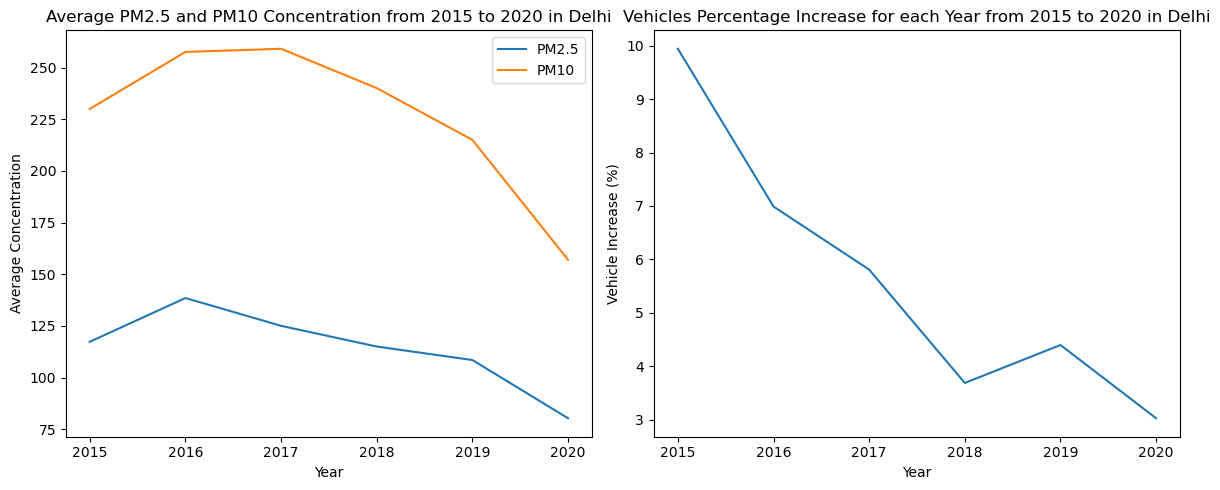

In [22]:
#Plots of the average PM concentration levels and vehicle increase (%) over the years
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(PM_group_year['Date'], PM_group_year['PM2.5'], label='PM2.5')
ax1.plot(PM_group_year['Date'], PM_group_year['PM10'], label='PM10')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Concentration')
ax1.set_title('Average PM2.5 and PM10 Concentration from 2015 to 2020 in Delhi')
ax1.legend()

ax2.plot(filtered_df['Year'], filtered_df['Increase (%)'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Vehicle Increase (%)')
ax2.set_title('Vehicles Percentage Increase for each Year from 2015 to 2020 in Delhi')

plt.tight_layout()
plt.show()